In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
from PIL import Image
import os, os.path

imgs = []
cnt = 0
DATASET_PATH = 'data/'
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(DATASET_PATH):
    cnt = cnt + 1
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(DATASET_PATH,f)))

In [3]:
print(len(imgs))
torch_imgs = []
imgs = imgs[0:20]
for img in imgs:
    trans = transforms.ToTensor()
    torch_img = trans(img)
    torch_imgs.append(torch_img)


20


In [21]:
def cut_up(image, pieces):
    
    """ Cut a given image into a desired number of smaller pieces. The slices will be squares.
    No guarantee that the desired number of pieces will be reached (by geometric reasons). """
    
    img_slices = []
    
    # get geometric properties of the image
    shape = list(image.shape)
    n = int(np.round(shape[1], decimals=0))
    m = int(np.round(shape[2], decimals=0))
    A = n*m # total area of given image
    a_star = A/pieces # area of a slice
    n_star = int(np.round(np.sqrt(a_star))) # side length of square
    h_steps = int(np.round(n/n_star)) # number of steps into vertical direction of image
    w_steps = int(np.round(m/n_star)) # number of steps into horizontal direction of image
    piece_shape = [3, n_star, n_star] # tensor shape of smaller image

    height = [0] # describes height while "sliding" over image
    for i in range(0, h_steps-1):
        height.append(height[i]+n_star) # appending element height[i+1]

    width = [0] # describes width while "sliding" over image
    for j in range(0, w_steps-1):
        width.append(width[j]+n_star) # appending element width[j+1]
    
    for i in range(0, h_steps):
        for j in range(0, w_steps):
            img_slice = torch.ones(piece_shape, dtype=torch.float64)
            try:
                for i in range(0,shape[0]): # looping over alle channels of tensor
                    img_slice[i][0:n_star, 0:n_star] = image[i][height[i]:height[i+1], width[j]:width[j+1]]
            except:
                print("Needed size: ", [n_star, n_star], "Rest in height: ", shape[1]-height[i], "Rest in width: ", shape[2]-width[j])
            
            img_slices.append(img_slice)
    
    print("Image was cut into ", len(img_slices) ,"pieces.")
    print("The slices have the shape:", img_slices[0].shape)
        
    return img_slices

In [22]:
img_slices = cut_up(torch_imgs[0],30)

h_steps:  4
w_steps:  7
len(height) 4
len(width) 7
Needed size:  [1221, 1221] Rest in height:  5460 Rest in width:  866
Needed size:  [1221, 1221] Rest in height:  5460 Rest in width:  866
Needed size:  [1221, 1221] Rest in height:  5460 Rest in width:  866
Needed size:  [1221, 1221] Rest in height:  5460 Rest in width:  866
Image was cut into  28 pieces.
The slices have the shape: torch.Size([3, 1221, 1221])


In [29]:
all_img_slices = np.array([])
for img in torch_imgs:
    img_slice = cut_up(img, 20)
    all_img_slices = np.append(all_img_slices, img_slice)

h_steps:  4
w_steps:  5
len(height) 4
len(width) 5
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Image was cut into  20 pieces.
The slices have the shape: torch.Size([3, 1495, 1495])
h_steps:  4
w_steps:  5
len(height) 4
len(width) 5
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Image was cut into  20 pieces.
The slices have the shape: torch.Size([3, 1495, 1495])
h_steps:  4
w_steps:  5
len(height) 4
len(width) 5
Needed size:  [1495, 1495] Rest in height:  5460 Rest in width:  2212
Needed size:  [1495, 1495] Rest in height:  5

In [32]:
print(all_img_slices.shape)
print(all_img_slices[0].shape)

(400,)
torch.Size([3, 1495, 1495])


In [12]:
print(len(img_slices))
for img in img_slices:
    print(img.shape)

7
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])
torch.Size([3, 273, 410])


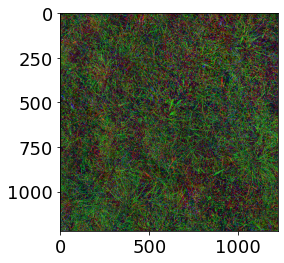

In [33]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 18

#plt.imshow(img_slices[0].permute(1, 2, 0))
plt.imshow(img_slices[1].permute(1, 2, 0))


plt.show()